### Import Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
import time

# Module 1: Data Acquisition and Preprocessing:

### 1. Data Acquisition:

In [127]:
df = pd.read_json('electronics.json', orient='records')
df

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,,70,Male,Medium,"566 Butler Turnpike\nPort Holly, OK 22329",776be313-5308-468e-a0ed-7409a4303364,2023-03-17,1802f115-80d8-48fd-ad97-94038fe31b82,Electronics,Brand_C,180,92,2,5,Medium,05,1987,Fall
996,2116266d-8d1c-48cc-ac28-e4e675cb2a4d,78,Female,Low,"45710 Wilson Circles Apt. 411\nWalterton, NC 8...",51f771bf-2562-46c1-a25d-2f46f4bb1525,2023-08-30,546d8d8f-1498-4aa9-8123-29550d911a17,Books,Brand_B,176,53,3,3,Medium,09,1977,Winter
997,562cee08-f909-4e1c-a811-5711f967bea5,63,Male,High,"243 Emily Creek\nSouth Lindaport, CO 81594",74eba598-ee91-4396-a137-6b869702ef29,Hidden,8b6ffec8-de54-445c-90d0-1399858b2e16,Hidden,Brand_C,212,99,2,9,Low,12,1995,Summer
998,84da2eea-6e9e-46d4-8d94-1e9b0c377d78,43,Male,High,"1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587",4d2e213e-bcc0-4a8a-9501-6ca8361381c4,2021-05-13,51ed2d86-c9ab-4922-a8ff-469acf6ac91e,Clothing,Brand_C,Hidden,98,8,7,Low,03,2000,


### 2 - DATA CLEANING

#### Identify null values

In [128]:
#null_values = df.isna().sum()
#print(null_values)
nulls = df.replace({"":np.nan,"Hidden": np.nan}, inplace=True)
null_values = df.isna().sum()
print(null_values)



Customer_ID                      44
Age                              40
Gender                           48
Income_Level                     50
Address                          47
Transaction_ID                   50
Purchase_Date                    48
Product_ID                       49
Product_Category                 60
Brand                            58
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     43
Month                            53
Year                             52
Season                           48
dtype: int64


#### Handle missing values using appropriate techniques like mean/median imputation

In [129]:
numeric_columns = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Fill NaN in numeric columns with mean values
for column in numeric_columns:
    df[column] = df[column].astype(float)
    df[column].fillna(df[column].mean(), inplace=True)
    
df['Month'].fillna(0, inplace=True)
df['Year'].fillna(0, inplace=True)

df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

df['Purchase_Date'].fillna(method='ffill', inplace=True)

string_columns = df.select_dtypes(include='object').columns
print(string_columns)
df[string_columns] = df[string_columns].fillna('unknown')


null_values = df.isna().sum()
print(null_values)

Index(['Customer_ID', 'Gender', 'Income_Level', 'Address', 'Transaction_ID',
       'Product_ID', 'Product_Category', 'Brand',
       'Product_Category_Preferences', 'Season'],
      dtype='object')
Customer_ID                      0
Age                              0
Gender                           0
Income_Level                     0
Address                          0
Transaction_ID                   0
Purchase_Date                    0
Product_ID                       0
Product_Category                 0
Brand                            0
Purchase_Amount                  0
Average_Spending_Per_Purchase    0
Purchase_Frequency_Per_Month     0
Brand_Affinity_Score             0
Product_Category_Preferences     0
Month                            0
Year                             0
Season                           0
dtype: int64


#### Drop excessive missingness columns

In [130]:
threshold = 0.8
df.dropna(axis=1, thresh=int(threshold * len(df)), inplace=True)

#### ANALYZE OUTLIERS

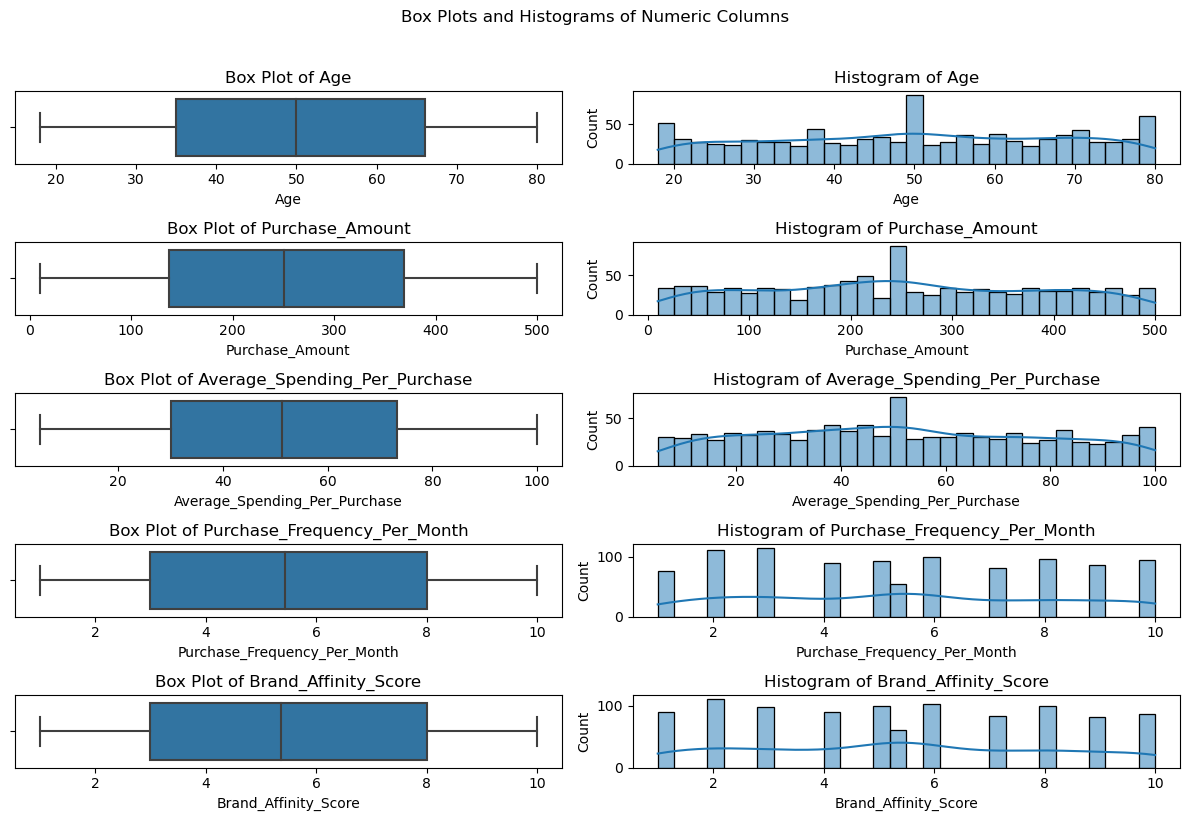

Column: Age, Number of outliers: 0, Lower Bound: -11.5, Upper Bound: 112.5
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season]
Index: []
Column: Purchase_Amount, Number of outliers: 0, Lower Bound: -211.0, Upper Bound: 717.0
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Product_Category, Brand, Purchase_Amount, Average_Spending_Per_Purchase, Purchase_Frequency_Per_Month, Brand_Affinity_Score, Product_Category_Preferences, Month, Year, Season]
Index: []
Column: Average_Spending_Per_Purchase, Number of outliers: 0, Lower Bound: -34.875, Upper Bound: 138.125
Empty DataFrame
Columns: [Customer_ID, Age, Gender, Income_Level, Address, Transaction_ID, Purchase_Date, Product_ID, Produc

In [131]:
#set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 8))
fig.suptitle('Box Plots and Histograms of Numeric Columns', y=1.02)

for i, column in enumerate(numeric_columns):
    #boxplot
    sns.boxplot(x=df[column], ax=axes[i, 0])
    axes[i, 0].set_title(f'Box Plot of {column}')
    
    #histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# IQR
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Column: {column}, Number of outliers: {len(outliers)}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(outliers)

#### Address inconsistencies in data format and encoding

In [132]:
df['Address'] = df['Address'].str.replace('\n', ', ')

categorical_columns = ['Gender', 'Income_Level', 'Product_Category_Preferences', 'Season']

df['Gender'] = df['Gender'].str.upper()
df['Income_Level'] = df['Income_Level'].str.upper()
df['Product_Category_Preferences'] = df['Product_Category_Preferences'].str.upper()
df['Season'] = df['Season'].str.upper()

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    
for column in categorical_columns:
    df[column] = df[column].astype('category')

Unique values in Gender: ['FEMALE' 'MALE' 'OTHER' 'UNKNOWN']
Unique values in Income_Level: ['MEDIUM' 'HIGH' 'LOW' 'UNKNOWN']
Unique values in Product_Category_Preferences: ['LOW' 'HIGH' 'MEDIUM' 'UNKNOWN']
Unique values in Season: ['WINTER' 'FALL' 'SUMMER' 'SPRING' 'UNKNOWN']


### 3 - DATA TRANSFORMATION

#### 1. New feaures

In [133]:
new_features = df[['Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preferences']]
new_features

,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences
0,59.0,2.0,2.0,LOW
1,77.0,2.0,1.0,LOW
2,100.0,9.0,1.0,LOW
3,97.0,3.0,4.0,LOW
4,85.0,7.0,2.0,HIGH
...,...,...,...,...
995,92.0,2.0,5.0,MEDIUM
996,53.0,3.0,3.0,MEDIUM
997,99.0,2.0,9.0,LOW
998,98.0,8.0,7.0,LOW


#### Standardization will be done after EDA so that it does not effect visualization

# Module 2: Exploratory Data Analysis(EDA)

### 1 - Univariate Analysis:

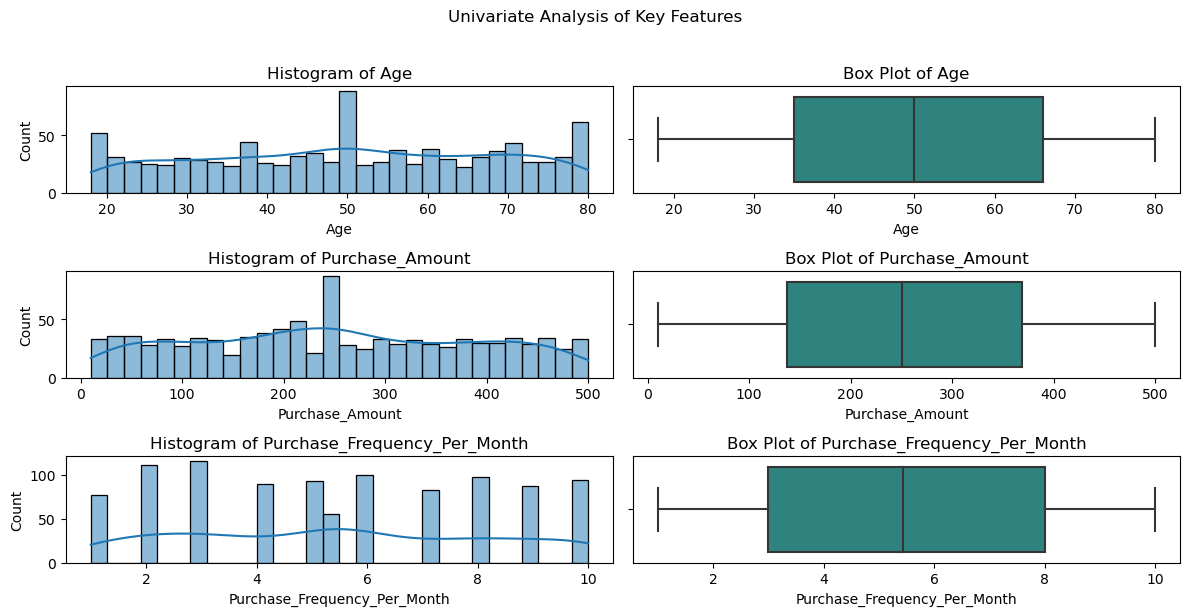

               Age  Purchase_Amount  Purchase_Frequency_Per_Month
count  1000.000000      1000.000000                   1000.000000
mean     49.885417       250.629863                      5.437037
std      18.108487       137.515156                      2.765891
min      18.000000        10.000000                      1.000000
25%      35.000000       137.000000                      3.000000
50%      49.885417       250.629863                      5.437037
75%      66.000000       369.000000                      8.000000
max      80.000000       500.000000                     10.000000


In [134]:

key_features = ['Age', 'Purchase_Amount', 'Purchase_Frequency_Per_Month']
#subplots
fig, axes = plt.subplots(nrows=len(key_features), ncols=2, figsize=(12, 2 * len(key_features)))
fig.suptitle('Univariate Analysis of Key Features', y=1.02)

for i, feature in enumerate(key_features):
    #histogram
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')

    #boxplot
    sns.boxplot(x=df[feature], ax=axes[i, 1], palette='viridis')
    axes[i, 1].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

descriptive_stats = df[key_features].describe()
print(descriptive_stats)

### Analysis:
During the univariate analysis of key features such as customer age, purchase amount, and purchase frequency, it was observed that the data does not exhibit significant skewness or outliers. The absence of outliers suggests that the dataset lacks extreme values or anomalies that could impact statistical analyses. This finding simplifies the analysis process and enhances the suitability of the data for certain statistical techniques.

### 2 - Bivariate Analysis:

#### 1. Scatterplot of Purchase Amount vs. Income Level

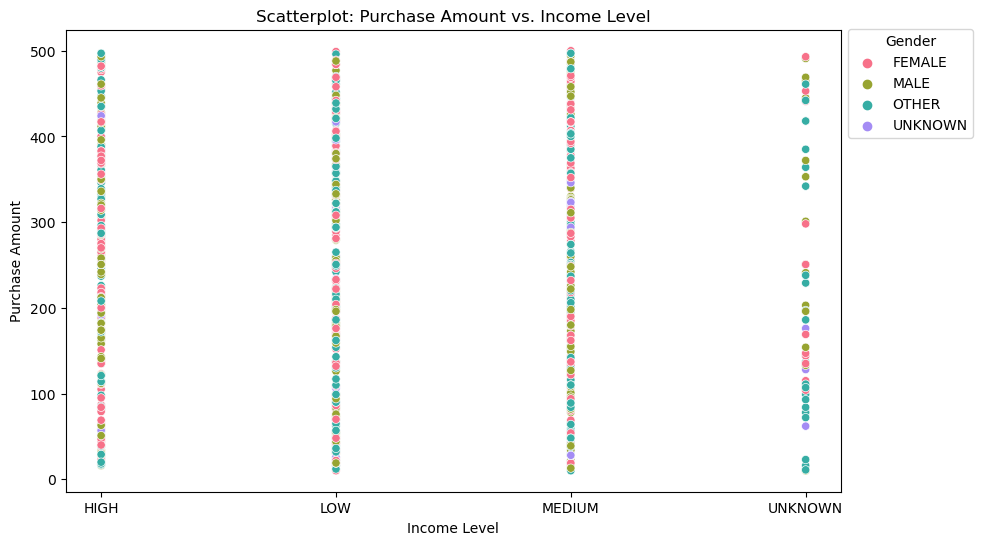

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income_Level', y='Purchase_Amount', hue='Gender', palette='husl')
plt.title('Scatterplot: Purchase Amount vs. Income Level')
plt.xlabel('Income Level')
plt.ylabel('Purchase Amount')
plt.legend(title='Gender', bbox_to_anchor=(1, 1.016))
plt.show()

#### 2. Scatterplot of Brand Affinity vs. Product Category

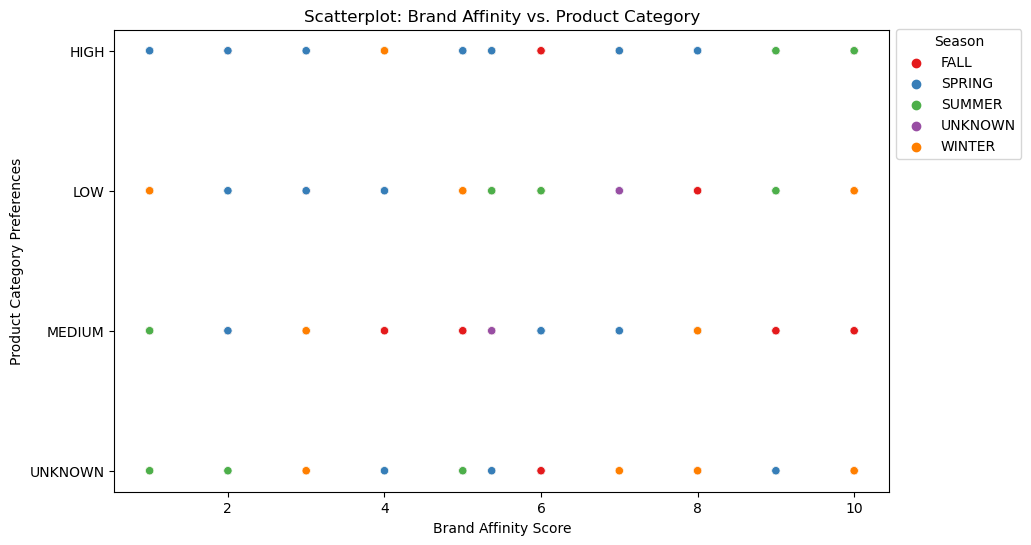

In [136]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Brand_Affinity_Score', y='Product_Category_Preferences', hue='Season', palette='Set1')
plt.title('Scatterplot: Brand Affinity vs. Product Category')
plt.xlabel('Brand Affinity Score')
plt.ylabel('Product Category Preferences')
plt.legend(title='Season', bbox_to_anchor=(1, 1.016))
plt.show()

#### 3. scatterplot of Purchase Frequency vs. Age

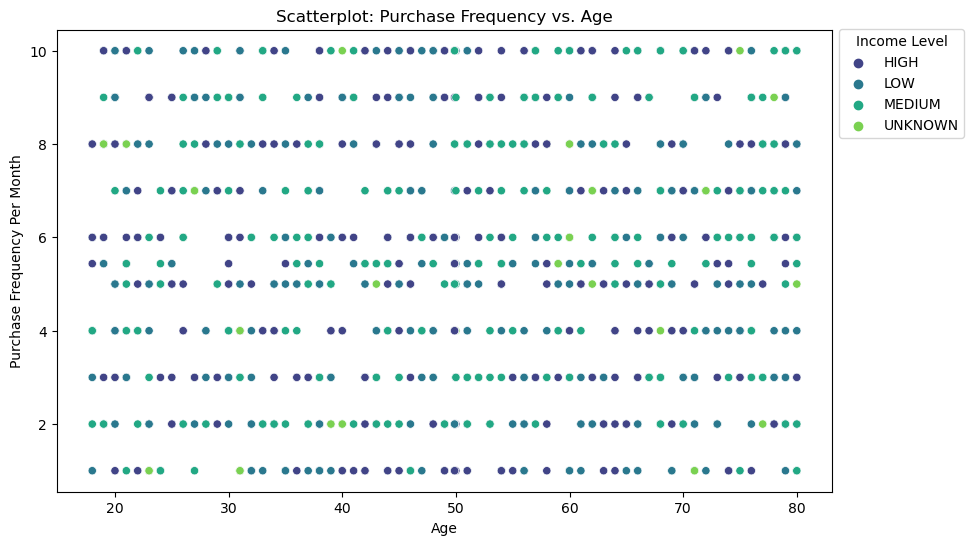

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase_Frequency_Per_Month', hue='Income_Level', palette='viridis')
plt.title('Scatterplot: Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency Per Month')
plt.legend(title='Income Level', bbox_to_anchor=(1, 1.016))
plt.show()

#### 4. Correlation Heatmap

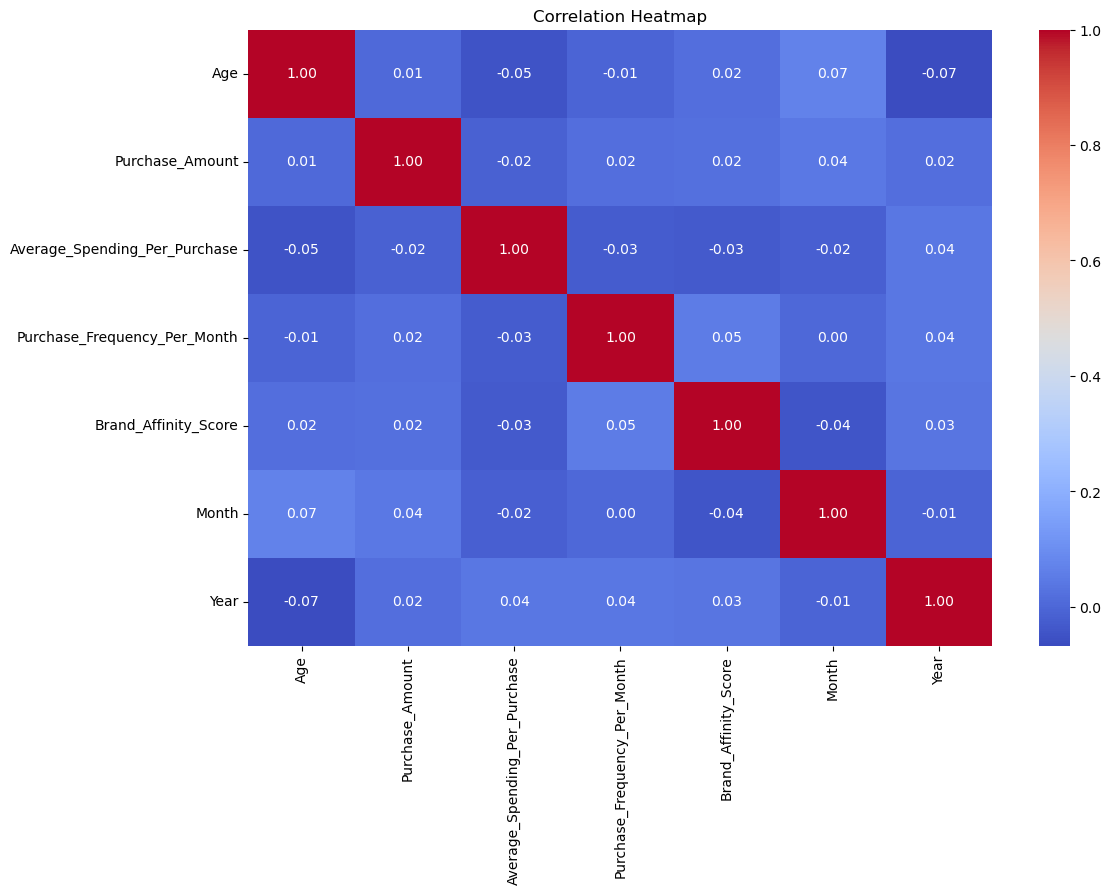

In [138]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Analysis:

#### Purchase Amount vs. Income Level
The customers with higher incomes tend to spend more money, but there is a lot of variation in the data. There are also some outliers on the plot, which are customers who spent much more or much less than you would expect based on their income level.

#### Brand Affinity vs. Product Category
There is not a lot of variation in brand affinity score across different product categories, but one thing to notice is the clustering in the middle of the plot across all the categories. It suggests that brand affinity scores are more towards average across all product category preferences

#### Purchase Frequency vs. Age
The correlation value (-0.01) being close to zero suggests that changes in Age are not systematically associated with changes in the Purchase_Frequency_Per_Month.

### 3 - Temporal Analysis:

#### 1. Purchase Frequency over time:

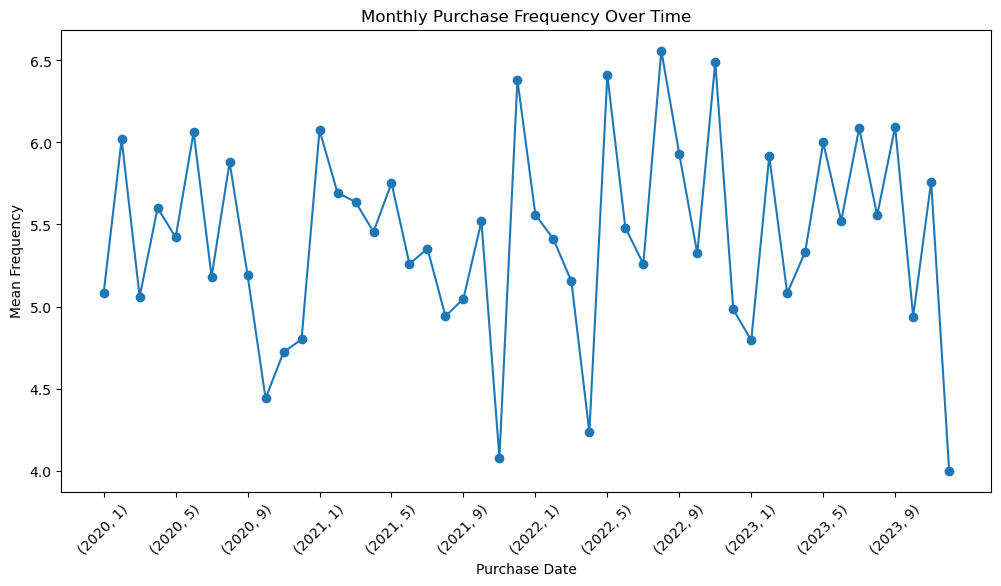

Max Date: (2022, 8) and Max Value: 6.56
Min Date: (2023, 12) and Min Value: 4.00


In [139]:
plt.figure(figsize=(12, 6))

purchase_frequency = df.groupby([df['Purchase_Date'].dt.year, df['Purchase_Date'].dt.month])['Purchase_Frequency_Per_Month'].mean()


purchase_frequency.plot(marker='o', linestyle='solid')

max_date = purchase_frequency.idxmax()
max_value = purchase_frequency[max_date]
min_date = purchase_frequency.idxmin()
min_value = purchase_frequency[min_date]

plt.title('Monthly Purchase Frequency Over Time')
plt.xlabel('Purchase Date')
plt.ylabel('Mean Frequency')
step = max(1, len(purchase_frequency.index) // 10)
plt.xticks(range(0, len(purchase_frequency.index), step),
           [f'({year}, {month})' for year, month in purchase_frequency.index][::step], rotation=45)
plt.show()

print(f'Max Date: {max_date} and Max Value: {max_value:.2f}')
print(f'Min Date: {min_date} and Min Value: {min_value:.2f}')


#### 2. Average Spending Over Time

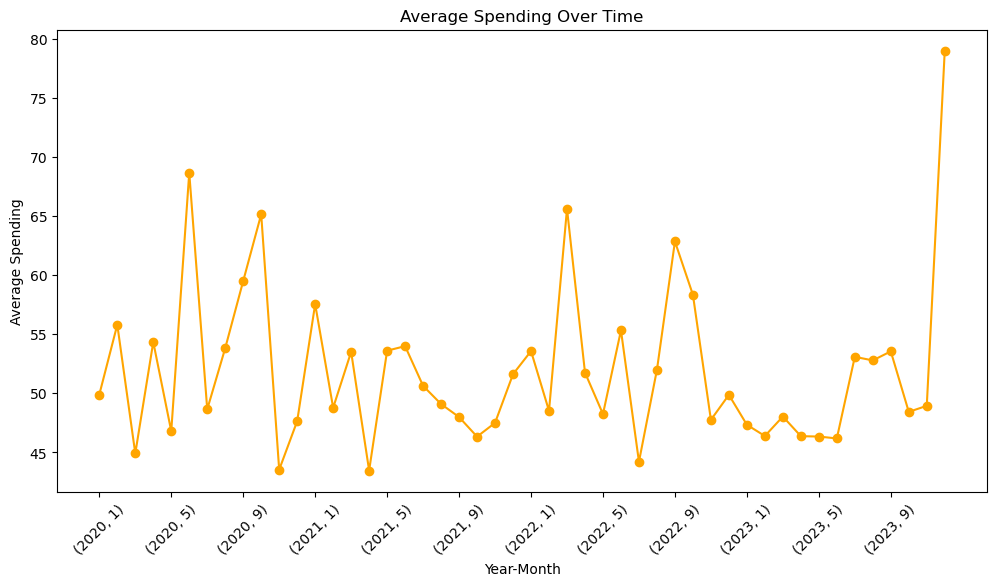

Max Date: (2023, 12) and Max Value: 79.00
Min Date: (2021, 4) and Min Value: 43.45


In [140]:
plt.figure(figsize=(12, 6))
avg_spending = df.groupby([df['Purchase_Date'].dt.year, df['Purchase_Date'].dt.month])['Average_Spending_Per_Purchase'].mean()
avg_spending.plot(marker='o', color='orange')

max_date = avg_spending.idxmax()
max_value = avg_spending[max_date]
min_date = avg_spending.idxmin()
min_value = avg_spending[min_date]

plt.title('Average Spending Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Spending')
step = max(1, len(avg_spending.index) // 10)
plt.xticks(range(0, len(avg_spending.index), step),
           [f'({year}, {month})' for year, month in avg_spending.index][::step], rotation=45)
plt.show()

print(f'Max Date: {max_date} and Max Value: {max_value:.2f}')
print(f'Min Date: {min_date} and Min Value: {min_value:.2f}')

#### 3. Product preferences Over Time

<Figure size 1200x600 with 0 Axes>

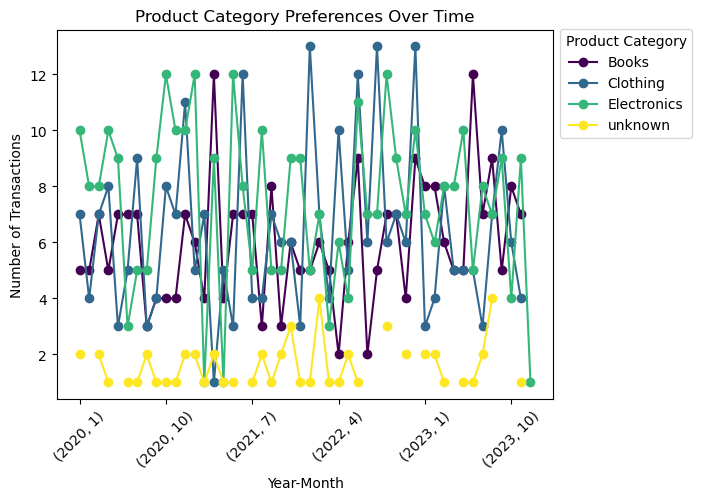

Product categories max sales on corresponding dates:
 Product_Category
Books           (2021, 3)
Clothing        (2022, 1)
Electronics    (2020, 10)
unknown         (2022, 2)
dtype: object Product_Category
Books          12.0
Clothing       13.0
Electronics    12.0
unknown         4.0
dtype: float64
Product categories min sales on corresponding dates:
 Product_Category
Books          (2022, 4)
Clothing       (2021, 3)
Electronics    (2021, 2)
unknown        (2020, 4)
dtype: object Product_Category
Books          2.0
Clothing       1.0
Electronics    1.0
unknown        1.0
dtype: float64


In [141]:
plt.figure(figsize=(12, 6))
Product_preferences = df.groupby([df['Purchase_Date'].dt.year, df['Purchase_Date'].dt.month])['Product_Category'].value_counts().unstack()
Product_preferences.plot(marker='o', cmap='viridis')
plt.title('Product Category Preferences Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Product Category', bbox_to_anchor=(1, 1.02))
step = max(1, len(Product_preferences.index) // 5)
plt.xticks(range(0, len(Product_preferences.index), step),
           [f'({year}, {month})' for year, month in Product_preferences.index][::step], rotation=45)
plt.show()

max_category_date = Product_preferences.idxmax()
max_category_value = Product_preferences.max()
min_category_date = Product_preferences.idxmin()
min_category_value = Product_preferences.min()

print("Product categories max sales on corresponding dates:\n", max_category_date, max_category_value)
print("Product categories min sales on corresponding dates:\n", min_category_date, min_category_value)


#### 4. Seasonal Variations During Various Seasons

##### 1. Using Purchase Amount

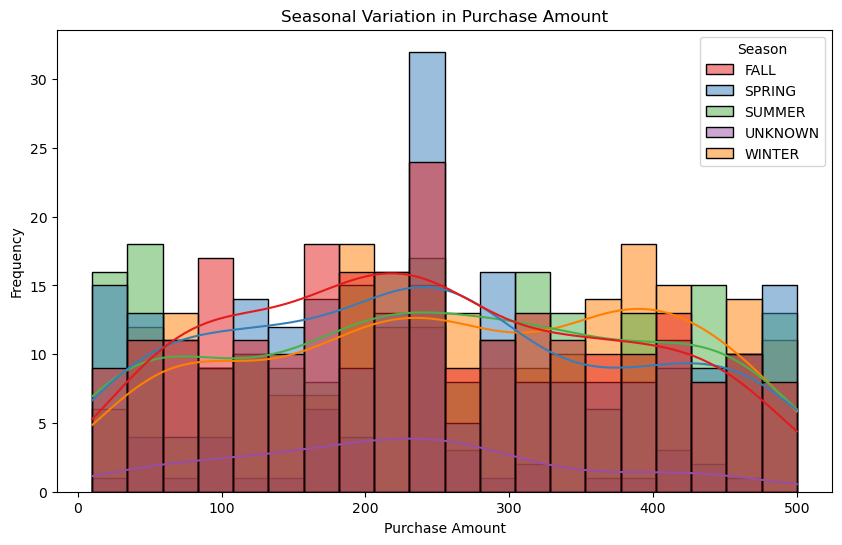

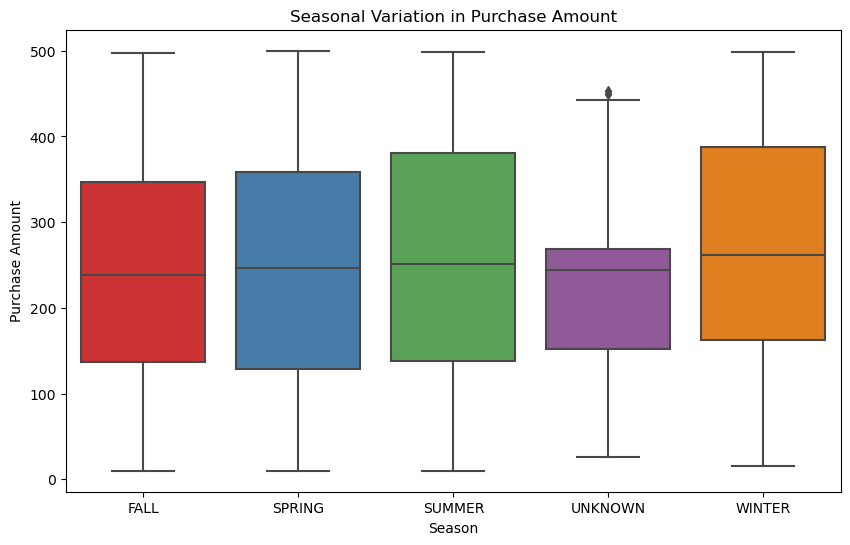

Seasonal Variation in Purchase Amount:
         count        mean         std   min     25%         50%     75%  \
Season                                                                     
FALL     246.0  243.468694  130.997758  10.0  137.00  238.000000  347.00   
SPRING   240.0  243.664366  140.765396  10.0  128.75  246.000000  358.75   
SUMMER   236.0  253.745928  143.224963  10.0  138.50  250.629863  380.25   
UNKNOWN   48.0  223.432900  117.689680  26.0  152.50  244.000000  269.25   
WINTER   230.0  268.036081  137.794051  16.0  162.50  261.500000  387.75   

           max  
Season          
FALL     497.0  
SPRING   500.0  
SUMMER   499.0  
UNKNOWN  453.0  
WINTER   498.0  
Outliers:
Empty DataFrame
Columns: [Season, Purchase_Amount]
Index: []


In [142]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='Purchase_Amount', hue='Season', data=df, bins=20, palette='Set1', kde=True)
plt.title('Seasonal Variation in Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

#boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase_Amount', data=df, palette='Set1')
plt.title('Seasonal Variation in Purchase Amount')
plt.xlabel('Season')
plt.ylabel('Purchase Amount')
plt.show()

# Seasonal analysis and outliers
seasonal_analysis = df.groupby('Season')['Purchase_Amount'].describe()
print("Seasonal Variation in Purchase Amount:")
print(seasonal_analysis)

Q1 = df['Purchase_Amount'].quantile(0.25)
Q3 = df['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Purchase_Amount'] < (Q1 - 1.5 * IQR)) | (df['Purchase_Amount'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers[['Season', 'Purchase_Amount']])

##### 2. Explore Seasonal Variations In Purchase Frequency

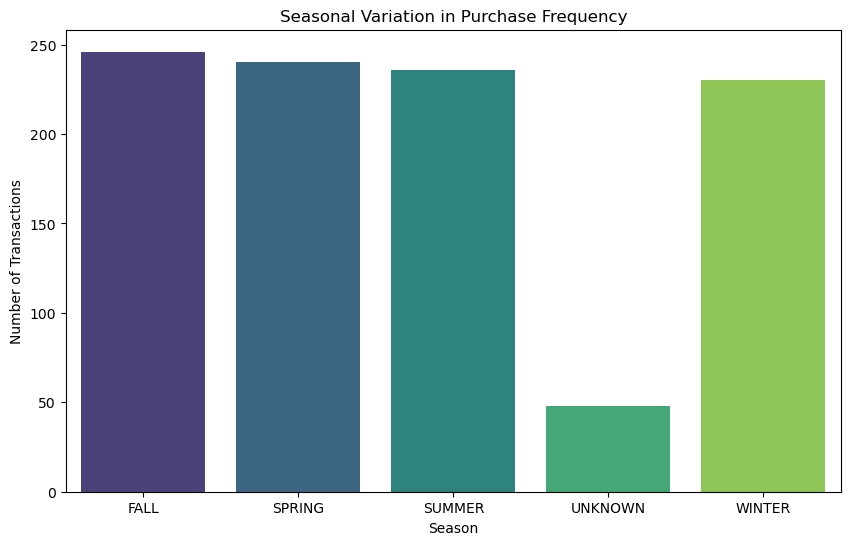

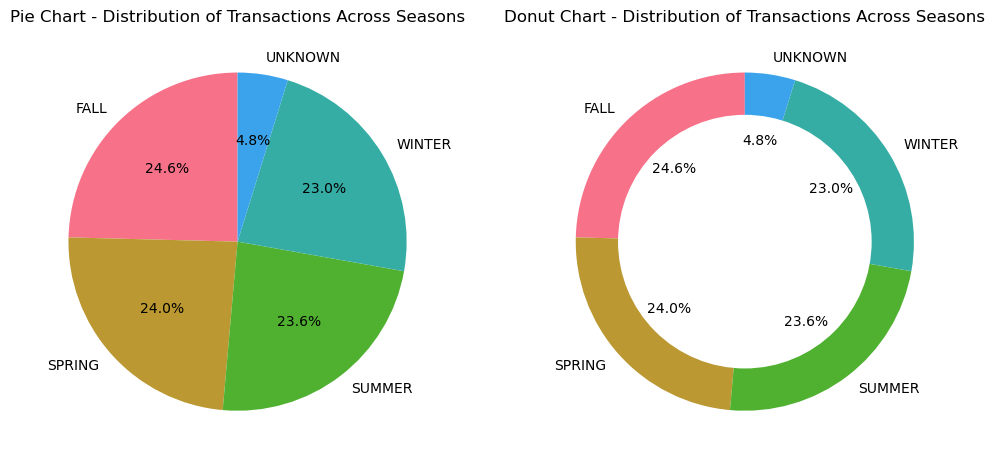

Analysis Report:

Season
FALL       246
SPRING     240
SUMMER     236
UNKNOWN     48
WINTER     230
Name: Transaction_ID, dtype: int64
count      5.000000
mean     200.000000
std       85.170417
min       48.000000
25%      230.000000
50%      236.000000
75%      240.000000
max      246.000000
Name: Transaction_ID, dtype: float64


In [143]:
#countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df, palette='viridis')
plt.title('Seasonal Variation in Purchase Frequency')
plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#pie chart
ax1 = axes[0]
seasonal_purchase_frequency = df['Season'].value_counts()
ax1.pie(seasonal_purchase_frequency, labels=seasonal_purchase_frequency.index, autopct='%1.1f%%', colors=sns.color_palette('husl'), startangle=90)
ax1.set_title('Pie Chart - Distribution of Transactions Across Seasons')

#donut chart
ax2 = axes[1]
ax2.pie(seasonal_purchase_frequency, labels=seasonal_purchase_frequency.index, autopct='%1.1f%%', colors=sns.color_palette('husl'), startangle=90)
ax2.add_artist(plt.Circle((0, 0), 0.75, fc='white'))
ax2.set_title('Donut Chart - Distribution of Transactions Across Seasons')

plt.show()

print("Analysis Report:\n")
seasonal_purchase_frequency = df.groupby('Season')['Transaction_ID'].count()
print(seasonal_purchase_frequency)
print(seasonal_purchase_frequency.describe())


# Module 3: Clustering Analysis

### Standardize or normalize numeric features

In [144]:
numeric_columns1 = ['Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']
X = df[numeric_columns1]
X_standardized = StandardScaler().fit_transform(X)
#apply PCA to reduce dimensions
pca = PCA(n_components=2)
scaled_pca = pca.fit_transform(X_standardized)

df_pca = pd.DataFrame(data=scaled_pca, columns=["PC1", "PC2"])
df_pca

,PC1,PC2
0,-1.693170,0.170225
1,-1.894368,1.215309
2,-1.187581,-0.077736
3,-1.548343,0.757111
4,-0.516580,1.504627
...,...,...
995,-1.665250,0.206342
996,-1.217099,-0.140511
997,-0.854428,0.279049
998,0.058061,0.060423


### A. K-Means Clustering

#### 1. Define the number of clusters (k):

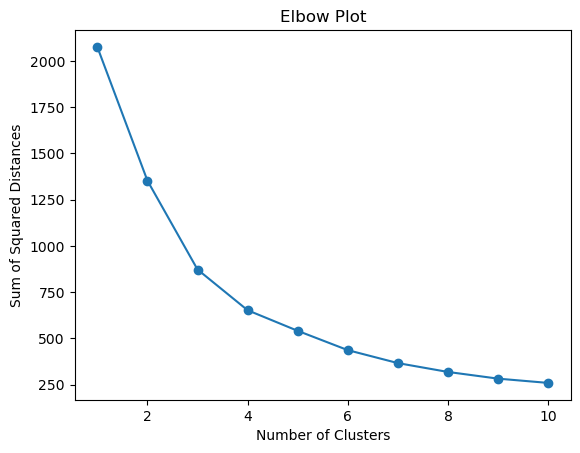

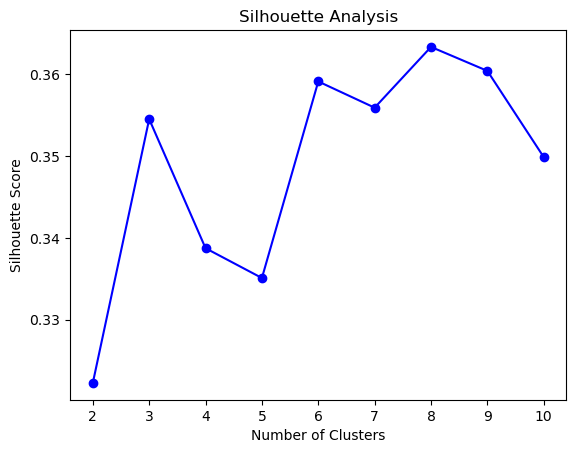

Optimal k with highest silhouette score: 8


8

In [145]:
#elbow Method
def find_optimal_k(data, max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    # Plot
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.show()
    
    #silhouette Analysis
def silhouette_analysis(data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', linestyle='-', color='b')
    plt.title('Silhouette Analysis')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    
    #highest silhouette score
    optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2
    print(f"Optimal k with highest silhouette score: {optimal_k_silhouette}") 
    return optimal_k_silhouette
    
find_optimal_k(scaled_pca)
silhouette_analysis(scaled_pca)

#### 2. Apply K-Means algorithm:

Silhouette Score for K-Means: 0.3387305872898502
Calinski-Harabasz Score: 724.3050
Davies-Bouldin Index: 0.8939


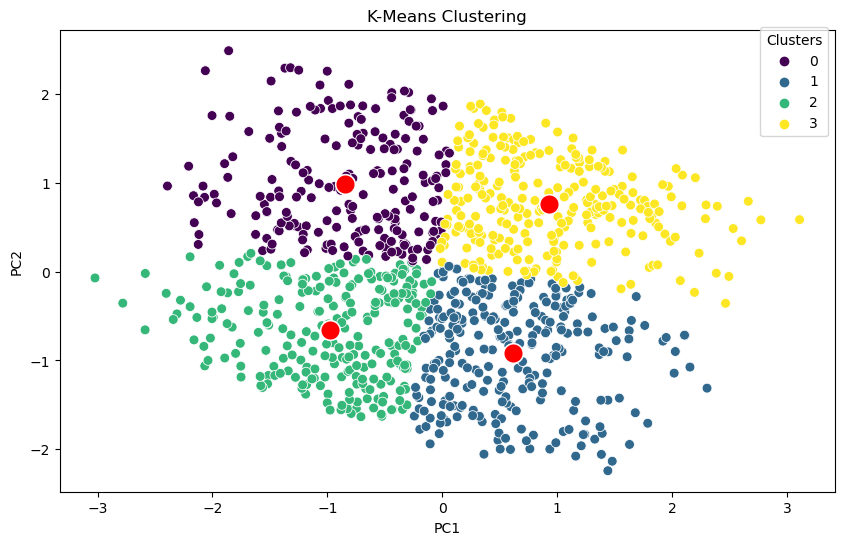


K-Means Cluster Sizes:
3    274
1    268
2    253
0    205
Name: Cluster, dtype: int64


In [146]:
optimal_k = 4
#K-Means clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(scaled_pca)
df["Cluster"] = kmeans.fit_predict(scaled_pca)
centroids = df_pca.groupby('Cluster').mean()

silhouette_avg = silhouette_score(scaled_pca, df_pca["Cluster"])
print(f"Silhouette Score for K-Means: {silhouette_avg}")

kmeans_score = calinski_harabasz_score(scaled_pca, df["Cluster"])
kmeans_db_index = davies_bouldin_score(scaled_pca, df["Cluster"])
print(f"Calinski-Harabasz Score: {kmeans_score:.4f}")

print(f"Davies-Bouldin Index: {kmeans_db_index:.4f}")

# Plot the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette='viridis', s=50)
sns.scatterplot(x="PC1", y="PC2", data=centroids, marker='o', color='red', s=200)

plt.title(f'K-Means Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))
plt.show()


cluster_sizes_kmeans = df_pca['Cluster'].value_counts()
print('\nK-Means Cluster Sizes:')
print(cluster_sizes_kmeans)

#### 3. Analyze cluster characteristics

Cluster Characteristics:
  Cluster Purchase_Amount            Brand_Affinity_Score  \
                     mean        std                 mean   
0       0      335.477351  82.717637             3.577199   
1       1      164.566631  77.456381             6.659148   
2       2      117.999564  69.574045             4.085151   
3       3      393.792919  64.815157             6.635114   

  Product_Category_Preferences  
                      <lambda>  
0                          LOW  
1                          LOW  
2                         HIGH  
3                          LOW  


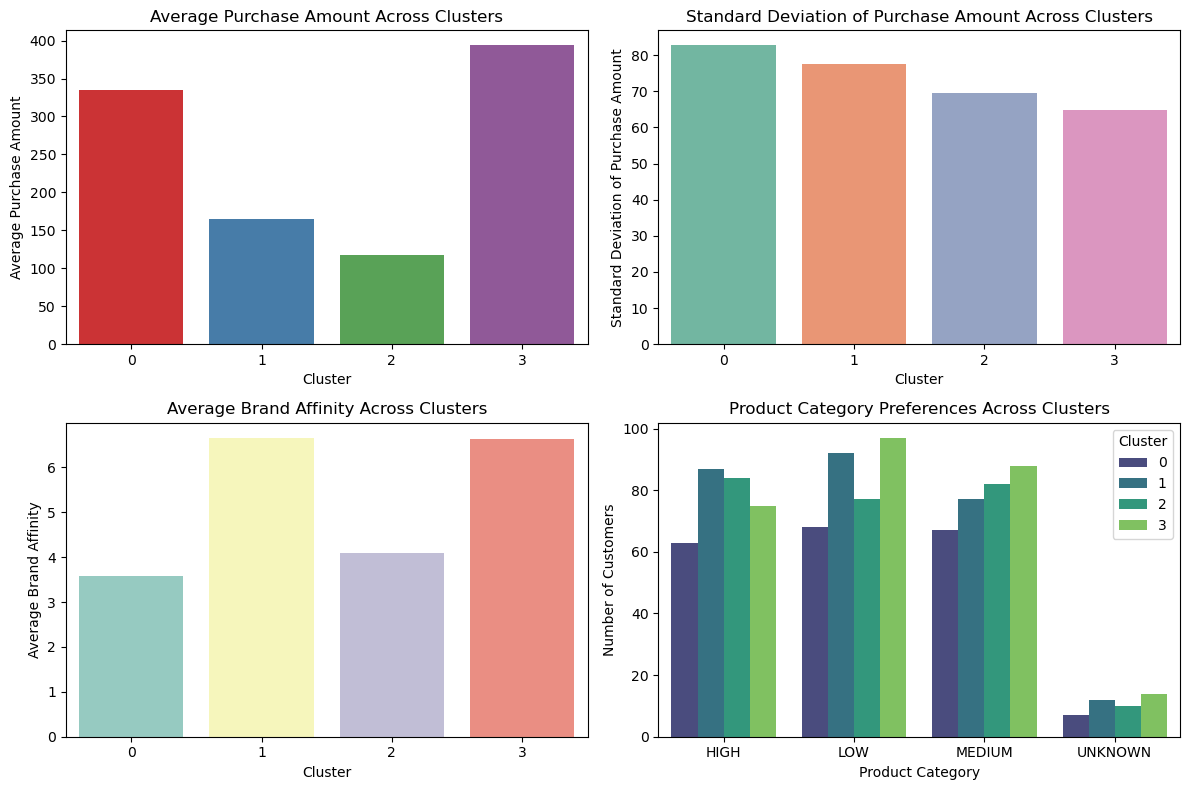

In [147]:
cluster_characteristics = df.groupby('Cluster').agg({
    'Purchase_Amount': ['mean', 'std'],
    'Brand_Affinity_Score': 'mean',
    'Product_Category_Preferences': lambda x: x.mode()[0]
}).reset_index()


print("Cluster Characteristics:")
print(cluster_characteristics)

#visualize cluster characteristics
plt.figure(figsize=(12, 8))

#average Purchase Amount
plt.subplot(2, 2, 1)
sns.barplot(x='Cluster', y=('Purchase_Amount', 'mean'), data=cluster_characteristics, palette='Set1')
plt.title('Average Purchase Amount Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount')

#standard Deviation of Purchase Amount
plt.subplot(2, 2, 2)
sns.barplot(x='Cluster', y=('Purchase_Amount', 'std'), data=cluster_characteristics, palette='Set2')
plt.title('Standard Deviation of Purchase Amount Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Standard Deviation of Purchase Amount')

# Average Brand Affinity
plt.subplot(2, 2, 3)
sns.barplot(x='Cluster', y=('Brand_Affinity_Score', 'mean'), data=cluster_characteristics, palette='Set3')
plt.title('Average Brand Affinity Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Brand Affinity')

#product Category Preferences
plt.subplot(2, 2, 4)
sns.countplot(x='Product_Category_Preferences', hue='Cluster', data=df, palette='viridis')
plt.title('Product Category Preferences Across Clusters')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### B. DBSCAN Clustering

#### 1. Define eps and MinPts parameters

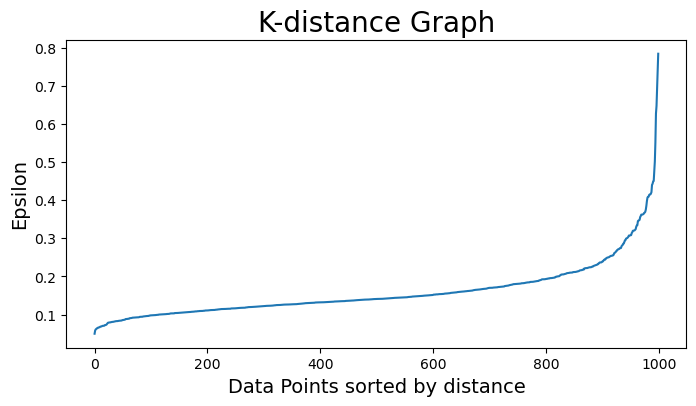

Optimal eps: 0.55
Best Silhouette Score: 0.4279962269674426
Best Epsilon: 0.7000000000000001
Best Min Samples: 25


In [148]:
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(scaled_pca)
distances, indices = nbrs.kneighbors(scaled_pca)

def find_optimal_eps(distances):
    differences = np.diff(distances)
    knee_point_index = np.argmax(differences)
    optimal_eps = distances[knee_point_index]
    return optimal_eps

distances = np.sort(distances, axis=0)
distances = distances[:, 5]

# Plot the k-distance graph
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title('K-distance Graph', fontsize=20)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

optimal_eps = find_optimal_eps(distances)
print(f'Optimal eps: {optimal_eps:.2f}')

best_eps = 0
best_min_samples = 0
best_silhouette_score = -1

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(5, 30):
        dbscan_opt = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan_opt.fit_predict(scaled_pca)

        if len(set(labels)) <= 1:
            continue

        silhouette_avg = silhouette_score(scaled_pca, labels)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Best Epsilon: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")

#### 2. Apply DBSCAN Algorithm

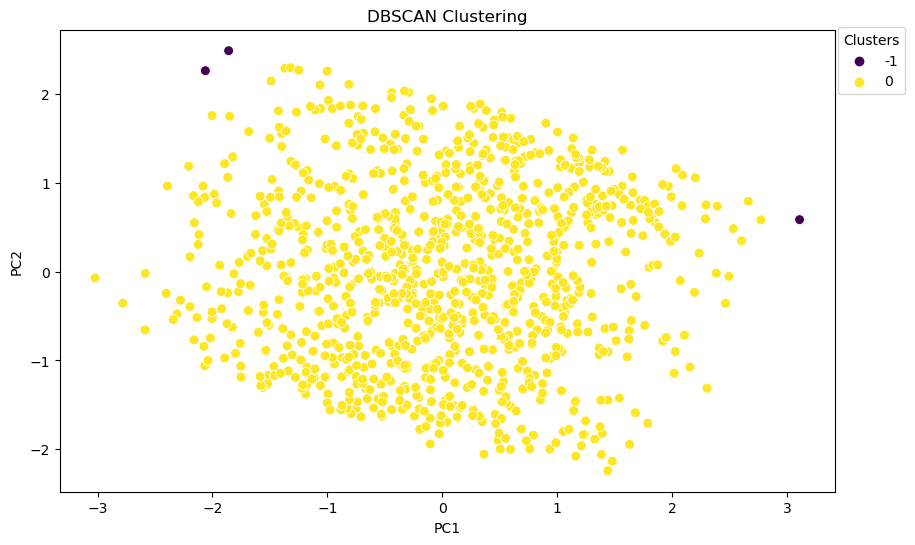

Silhouette Score: 0.4279962269674426
Calinski-Harabasz Score: 4.7022
Davies-Bouldin Index: 2.0512

DBSCAN Cluster Sizes:
 0    997
-1      3
Name: DBSCAN_opt_labels, dtype: int64


In [149]:
optimal_eps = 0.7000000000000001
min_samples = 25

# Perform DBSCAN
dbscan_opt = DBSCAN(eps=optimal_eps, min_samples=min_samples)
df["DBSCAN_opt_labels"] = dbscan_opt.fit_predict(scaled_pca)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue=df['DBSCAN_opt_labels'], data=df_pca, palette='viridis', s=50)

plt.title(f'DBSCAN Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1.1, 1.02))
plt.show()

silhouette_avg = silhouette_score(scaled_pca, df["DBSCAN_opt_labels"])
print(f"Silhouette Score: {silhouette_avg}")

dbscan_score = calinski_harabasz_score(scaled_pca, df["DBSCAN_opt_labels"])
dbscan_db_index = davies_bouldin_score(scaled_pca, df["DBSCAN_opt_labels"])

print(f"Calinski-Harabasz Score: {dbscan_score:.4f}")
print(f"Davies-Bouldin Index: {dbscan_db_index:.4f}")

# Display DBSCAN Cluster Sizes
cluster_sizes_dbscan = df['DBSCAN_opt_labels'].value_counts()
print('\nDBSCAN Cluster Sizes:')
print(cluster_sizes_dbscan)

#### 3. Analyze Cluster Characteristics

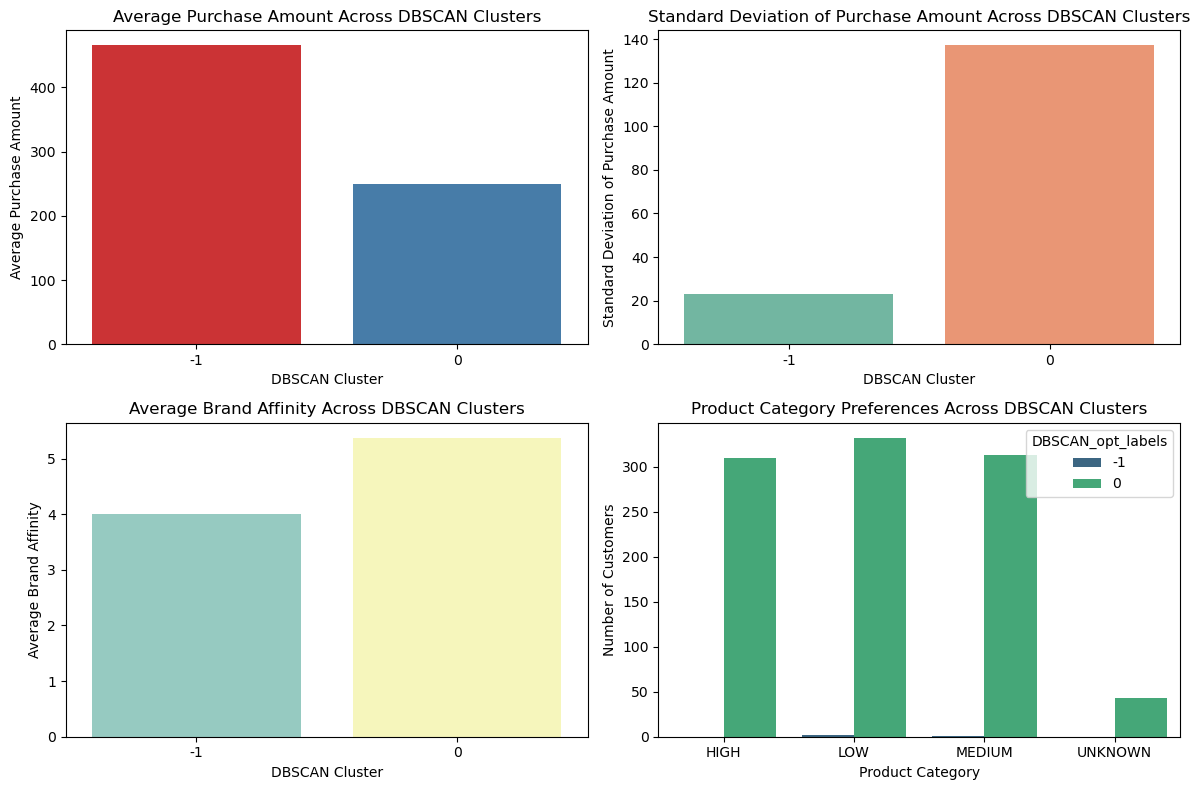

DBSCAN Cluster Characteristics:
  DBSCAN_opt_labels Purchase_Amount             Brand_Affinity_Score  \
                               mean         std                 mean   
0                -1      465.666667   23.094011             4.000000   
1                 0      249.982812  137.210086             5.373663   

  Product_Category_Preferences  
                      <lambda>  
0                          LOW  
1                          LOW  


In [150]:
# Analyze DBSCAN cluster characteristics
cluster_characteristics_dbscan = df.groupby('DBSCAN_opt_labels').agg({
    'Purchase_Amount': ['mean', 'std'],
    'Brand_Affinity_Score': 'mean',
    'Product_Category_Preferences': lambda x: x.mode()[0]
}).reset_index()

# Visualize DBSCAN cluster characteristics
plt.figure(figsize=(12, 8))

# Average Purchase Amount
plt.subplot(2, 2, 1)
sns.barplot(x='DBSCAN_opt_labels', y=('Purchase_Amount', 'mean'), data=cluster_characteristics_dbscan, palette='Set1')
plt.title('Average Purchase Amount Across DBSCAN Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Average Purchase Amount')

# Standard Deviation of Purchase Amount
plt.subplot(2, 2, 2)
sns.barplot(x='DBSCAN_opt_labels', y=('Purchase_Amount', 'std'), data=cluster_characteristics_dbscan, palette='Set2')
plt.title('Standard Deviation of Purchase Amount Across DBSCAN Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Standard Deviation of Purchase Amount')

# Average Brand Affinity
plt.subplot(2, 2, 3)
sns.barplot(x='DBSCAN_opt_labels', y=('Brand_Affinity_Score', 'mean'), data=cluster_characteristics_dbscan, palette='Set3')
plt.title('Average Brand Affinity Across DBSCAN Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Average Brand Affinity')

# Product Category Preferences
plt.subplot(2, 2, 4)
sns.countplot(x='Product_Category_Preferences', hue='DBSCAN_opt_labels', data=df, palette='viridis')
plt.title('Product Category Preferences Across DBSCAN Clusters')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

print("DBSCAN Cluster Characteristics:")
print(cluster_characteristics_dbscan)


### Comparison between K-Means and DBSCAN Clusters:

#### 1. Cluster Sizes:

##### DBSCAN:
Cluster 0: 997
Noise (Cluster -1): 3
##### K-Means:
Cluster 2: 253
Cluster 0: 205
Cluster 3: 274
Cluster 1: 268

###### Observation: 
DBSCAN assigns the majority of points to one cluster (Cluster 0) and considers only a small number of points as noise. In contrast, K-Means forms clusters of different sizes.

#### 2. Silhouette Score:
DBSCAN: 0.42
K-Means:   0.33

#### 3. Observation: 
Silhouette scores provide a measure of how well-defined and separated the clusters are. A higher silhouette score generally indicates better-defined clusters. As the silhouette score for DBSCAN is higher, it suggests that DBSCAN is forming more cohesive clusters.

#### 4. Visual Inspection:
K-Means formed well-separated clusters in the scatter plot.
DBSCAN created a more connected cluster structure, especially with a large number of data points in one cluster.

### C. K-Means++ Clustering

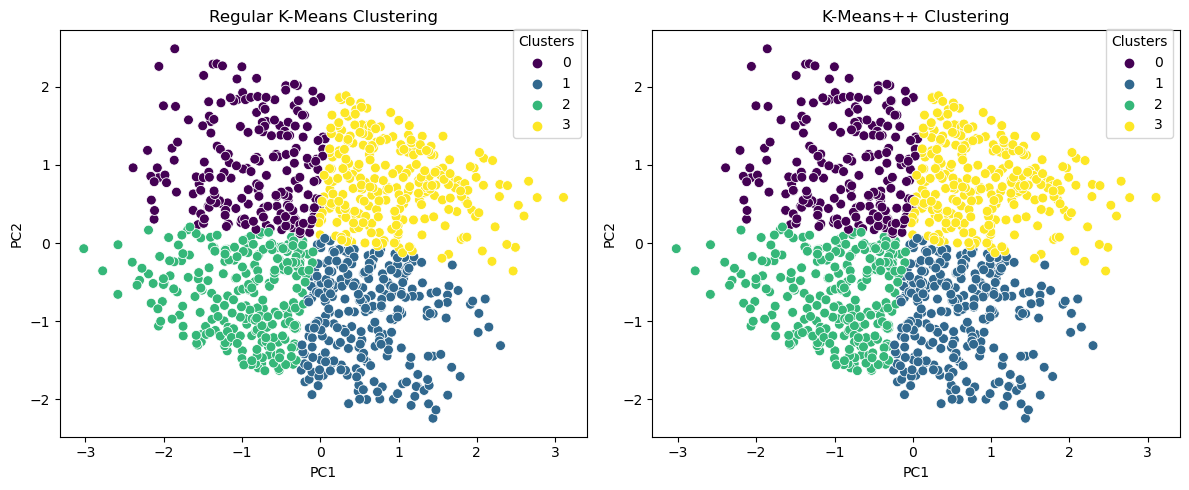

Silhouette Score for Regular K-Means: 0.3387305872898502
Convergence Time for Regular K-Means: 2.4630 seconds
Silhouette Score for K-Means++: 0.3387305872898502
Convergence Time for K-Means++: 2.0862 seconds
Calinski-Harabasz Score K-Means++: 724.3050
Davies-Bouldin Index K-Means++: 0.8939


In [151]:
optimal_k = 4

#K-Means
start_time_regular = time.time()
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df_pca["Cluster"] = kmeans.fit_predict(scaled_pca)
end_time_regular = time.time()

# K-Means++
start_time_pp = time.time()
kmeans_pp = KMeans(n_clusters=optimal_k, n_init=10, random_state=42, init='k-means++')
df_pca["Cluster++"] = kmeans_pp.fit_predict(scaled_pca)
end_time_pp = time.time()


#scatter plot for Regular K-Means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=df_pca, palette='viridis', s=50)
plt.title(f'Regular K-Means Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))

#scatter plot for K-Means++
plt.subplot(1, 2, 2)
sns.scatterplot(x="PC1", y="PC2", hue="Cluster++", data=df_pca, palette='viridis', s=50)
plt.title(f'K-Means++ Clustering')
plt.legend(title='Clusters', bbox_to_anchor=(1, 1.02))

plt.tight_layout()
plt.show()

#silhouette score for K-Means
silhouette_avg_regular = silhouette_score(scaled_pca, df_pca["Cluster"])
print(f"Silhouette Score for Regular K-Means: {silhouette_avg_regular}")
print(f"Convergence Time for Regular K-Means: {end_time_regular - start_time_regular:.4f} seconds")

#silhouette Score for K-Means++
silhouette_avg_pp = silhouette_score(scaled_pca, df_pca["Cluster++"])
print(f"Silhouette Score for K-Means++: {silhouette_avg_pp}")
print(f"Convergence Time for K-Means++: {end_time_pp - start_time_pp:.4f} seconds")

kmeans_pp_score = calinski_harabasz_score(scaled_pca, df_pca["Cluster"])
kmeans_pp_db_index = davies_bouldin_score(scaled_pca, df_pca["Cluster"])

print(f"Calinski-Harabasz Score K-Means++: {kmeans_pp_score:.4f}")
print(f"Davies-Bouldin Index K-Means++: {kmeans_pp_db_index:.4f}")


# Module 4: Comparison and Conclusion:

## 1.  Compare the results of all three clustering algorithms:

### 1. Cluster Sizes:
K-Means: Cluster sizes (253, 205, 274, 268)
DBSCAN: Cluster sizes (997, 3)
K-Means formed multiple clusters with varying sizes, while DBSCAN predominantly assigned data points to one large cluster.

### 2. Visualization:
K-Means formed well-separated clusters in the scatter plot.
DBSCAN created a more connected cluster structure, especially with a large number of data points in one cluster.
K-Means++ showed similar results to Regular K-Means.

### 3. Metrics

#### Silhouette Score:
K-Means: 0.33
DBSCAN: 0.42
K-Means++: 0.0.33

#### Calinski-Harabasz Score:
K-Means: 724.30
DBSCAN: 4.7022
K-Means++: 724.30

#### Davies-Bouldin Index:
K-Means: 0.8939
DBSCAN: 2.05
K-Means++: 0.8939

#### Interpretation:
DBSCAN has the highest Silhouette Score, indicating well-defined clusters with good separation.
K-Means and K-Means++ have similar performance in terms of the Calinski-Harabasz score, suggesting similar variance ratios.
K-Means and K-Means++ also have similar Davies-Bouldin Index values, indicating comparable average similarity between clusters compared to DBSCAN, implying better clustering quality.

#### Recommendations:
Considering the evaluation across these metrics, K-Means emerges as a robust choice for your clustering task. Its consistent performance in achieving well-defined clusters, along with the efficiency of K-Means++, positions them as favorable algorithms for your dataset.

### 4. Advantages and Disadvantages:

#### K-Means:
Advantages: Efficient for well-separated, spherical clusters. Simple and computationally efficient.
Disadvantages: Sensitive to initial centroids, may not perform well with non-spherical clusters.

#### DBSCAN:
Advantages: Doesn't assume clusters' shapes, can find clusters of arbitrary shapes. Robust to noise.
Disadvantages: Sensitive to hyperparameter tuning, may struggle with clusters of varying densities.

#### K-Means++:
Advantages: Improved initialization for K-Means, potentially faster convergence.
Disadvantages: Similar to K-Means, sensitivity to initial centroids.

### 5. Recommendations:
K-Means: Suitable for well-separated, spherical clusters.
DBSCAN: Suitable for datasets with irregularly shaped or varying density clusters.
K-Means++: Consider when faster convergence is desired, but performance may be similar to Regular K-Means.

### 6. Conclusion:
The choice of algorithm depends on the specific characteristics of the data and the desired cluster properties.
For Imtiaz Mall's needs, K-Means might provide actionable insights into distinct customer segments, while DBSCAN could reveal patterns in densely populated areas.



## 2.  Draw conclusions and recommendations:

### 1. Customer Segmentation Insights:

#### EDA Analysis:

##### 1. Age Distribution:
The age distribution within the electronics section is diverse, covering a wide range from 18 to 80 years.
No specific age group dominates, suggesting that electronics attract customers across different life stages.

##### 2. Purchase Behavior:
The mean purchase amount is 250.63, indicating moderate spending on electronics.
Purchase frequency per month ranges from 1 to 10, with a mean of 5.44.
This suggests a diverse customer base, including both occasional and frequent shoppers.

##### 3. Brand Affinity:
Brand affinity scores across different product categories show consistent clustering.
Customers within the electronics section exhibit average brand affinity, indicating a balanced preference for various brands.

##### 4. Temporal Trends:
Electronics sales peaked in October 2020, suggesting potential seasonality or product launches during that period.
Continuous monitoring is recommended to adapt strategies to changing trends, such as the observed decline in sales by December 2023.

### Clustering Analysis:

##### 1. K-Means Clusters: 
Formed clusters with varying sizes based on purchase behavior.
Analyzed cluster characteristics, including average purchase amount, standard deviation, brand affinity, and product category preferences.

##### 2. DBSCAN Clusters:
Identified 1 main cluster with only 3 points as noise.
Explored cluster characteristics, including average purchase amount, brand affinity, and product category preferences.

##### 3. K-Means++:
Applied K-Means++ for enhanced initialization of centroids, leading to similar results as the regular K-Means algorithm.

#### Conclusion:
The electronics section has different customer segments where each one of them exhibit unique purchasing behaviors. By combining insights from different clustering algorithms, the retailer can develop targeted strategies to maximize customer engagement, loyalty, and overall sales within the electronics category.


### 2. Key Factors Differentiating Customer Segments:

#### 1. Key Factors Differentiating Customer Segments Based on EDA:

##### Purchase Amount:
Standard deviation indicates moderate variability.
No extreme outliers, suggesting a relatively uniform distribution.

##### Purchase Frequency:
No extreme values or anomalies.
Weak correlation with age, indicating that age changes are not systematically associated with changes in purchase frequency.

##### Brand Affinity:
Affinity scores cluster around the average across all product category preferences.
Limited variation in brand affinity scores among different product categories.

##### Temporal Analysis:
Monthly purchase frequency ranged from 4 to 6.56, showing temporal variations.
Average spending per purchase varied over time, ranging from $43.45 to $79.
Product category preferences showed fluctuations over time, with varying sales peaks and troughs.

#### 2. Purchasing Behavior Patterns Based on EDA:

##### Income Level vs. Purchase Amount:
Weak positive correlation, indicating that customers with higher incomes tend to spend more.
Variation in data suggests diverse spending behaviors, with outliers spending significantly more or less than expected based on income.

##### Brand Affinity vs. Product Category:
Limited variation in brand affinity scores across different product categories.
Clustering around average scores suggests a consistent affinity pattern across categories.

##### Purchase Frequency vs. Age:
Weak correlation, implying that changes in age are not strongly associated with changes in purchase frequency.
Purchase frequency appears to be relatively consistent across different age groups.

##### Temporal Trends:
Monthly purchase frequency and average spending per purchase exhibit temporal variations.
Product category preferences show changes over time, with peaks and troughs for different categories.

#### Conclusion:
The customer base exhibits diverse purchasing behaviors with varying spending patterns.
Age alone does not appear to be a strong differentiator in purchasing behavior.
Income level, brand affinity, and temporal factors may play more significant roles in segmenting customers.

#### 1. Key Factors Differentiating Customer Segments Based on Clustering:

#### K-Means Clustering:


##### Cluster sizes for K-Means: 
Cluster 2 (253), Cluster 0 (205), Cluster 3 (274), Cluster 1 (268).
Varied cluster sizes suggest different customer segmentations.

##### Cluster Characteristics:

##### Purchase Amount:
Cluster 3 has the highest mean purchase amount, indicating high-value customers.
Cluster 0 has slight lower mean purchase amount than Cluster 1.
Cluster 2 and Cluster 3 show lower mean purchase amounts with cluster 2 being the lowest.

##### Brand Affinity:
Brand affinity scores vary across clusters, but there are not very significant differences between them.

##### Product Category Preferences:
Cluster 0 shows highest value in LOW category and lowest in HIGH category.
Cluster 1 shows highest value in LOW category and lowest in MEDIUM category.
Cluster 2 shows highest value in high category and lowest in LOW category.
Cluster 3 shows highest value in MEDIUM category and lowest in HIGH category.

#### DBSCAN Clustering:

##### Cluster sizes for DBSCAN:
Cluster 0 (997), Noise/Outliers (-1) (3).
Predominantly one large cluster with a few outliers.

##### Cluster Characteristics:

##### Purchase Amount:
Mean purchase amount is around 250 within the large cluster.

##### Brand Affinity:
Brand affinity score is slightly higher than 5 within the cluster.

##### Product Category Preferences:
LOW product categorie has the highest value within the large cluster.
HIGH category being the lowest but not a lot of difference between it and MEDIUM category

#### K-Means++ Clustering:
K-Means++ clusters exhibit same behavior as K-Means clusters with equal sizes of clusters.


### 3. Data-Driven Strategies for Customer Retention and Sales Growth:

#### High-Value Customer Segment (K-Means Cluster 3):

Mean Purchase Amount: $393.79
Standard Deviation of Purchase Amount: $64.82
Mean Brand Affinity Score: 6.64
Product Category Preferences: LOW

##### Retention:
Implement a loyalty program with exclusive benefits for high-value customers.
Personalized communication and offers based on past purchases and preferences.

##### Sales Growth:
Introduce premium products or services to encourage increased spending.
Cross-selling and upselling strategies to maximize revenue.

#### Moderate-Value Customer Segment (K-Means Clusters 0, 2):

##### Cluster 0:
Mean Purchase Amount: $335.48
Standard Deviation of Purchase Amount: $82.72
Mean Brand Affinity Score: 3.58
Product Category Preferences: LOW

##### Cluster 2:
Mean Purchase Amount: $118.00
Standard Deviation of Purchase Amount: $69.57
Mean Brand Affinity Score: 4.09
Product Category Preferences: HIGH

##### Retention:
Engage customers through targeted email campaigns and promotions.
Provide incentives for repeat purchases and brand loyalty.

##### Sales Growth:
Bundle related products to encourage higher basket values.
Introduce limited-time promotions to stimulate purchasing.

#### Low-Value Customer Segments (K-Means Clusters 1):

Mean Purchase Amount: $164.57
Standard Deviation of Purchase Amount: $77.46
Mean Brand Affinity Score: 6.66
Product Category Preferences: LOW

##### Limited-Time Offers:
Run flash sales, clearance events, or exclusive discounts for low-value segments.
Create a sense of urgency to prompt immediate action and purchases.
Experiment with time-limited promotions to stimulate buying behavior.

##### Cross-Channel Engagement:
Utilize multiple channels for engagement, including social media, email, and mobile apps.
Create cohesive marketing campaigns across channels to maintain a consistent brand image.
Encourage customers to follow the brand on social platforms for updates and promotions.

#### Large Cluster (DBSCAN Cluster 0):

##### Retention:
Understand the diverse preferences within the large cluster and tailor communication.
Identify key factors driving purchases and personalize recommendations.

##### Sales Growth:
MEDIUM and LOW product categories are the most popular in the larger cluster.
Run promotions aligned with the prevalent product categories.

#### Outlier Analysis (DBSCAN Noise Cluster -1):

##### Retention:
Investigate outliers for potential issues or anomalies in the data.
Seek feedback from outliers to understand their unique preferences.

##### Sales Growth:
Offer personalized incentives to outliers to encourage increased engagement.


### 4.  Potential Applications of Clustering Results:

#### Personalized Product Recommendations:
Leverage cluster-specific purchasing patterns to tailor product recommendations.
Implement collaborative filtering and recommendation engines for each customer segment.
Enhance the shopping experience by suggesting products aligned with individual preferences.

#### Targeted Marketing Campaigns:
Design marketing campaigns specific to each customer segment's characteristics.
Tailor advertising content, visuals, and messaging to resonate with the preferences of each cluster.
Utilize insights from clusters to choose the most effective marketing channels for each segment.

#### Tailored Loyalty Programs:
Develop loyalty programs customized to the preferences and behaviors of different clusters.
Offer exclusive rewards, discounts, or early access based on the preferences of each segment.
Implement tiered loyalty structures to encourage customers to ascend to higher-value segments.

#### Customer Retention Strategies:
Identify potential risks by analyzing the behavior of specific clusters.
Implement targeted retention strategies, such as personalized offers or loyalty bonuses.
Use predictive analytics to foresee potential churn and take proactive measures.

#### Segment-Specific Promotions:
Launch promotions and discounts that specifically appeal to the preferences of each cluster.
Communicate promotions through channels preferred by each segment for maximum impact.
Monitor the response to promotions and adjust future campaigns based on cluster feedback.

#### Predictive Analytics for Future Trends:
Use clustering results to predict future trends and preferences.
Use historical data from clusters to identify patterns and forecast future buying behaviors.
Stay ahead of market trends, allowing the business to proactively adjust strategies and offerings.


### 5. Further Analysis and Investigations for Optimizing Electronics Section Performance:

#### Dynamic Pricing Optimization:
Optimize pricing strategies for electronics products.
Explore price elasticity within customer segments, evaluate competitor pricing, and analyze historical sales data for price optimization opportunities.
Maximize revenue and competitiveness by setting prices that align with customer willingness to pay and market dynamics.

#### Channel Performance Analysis:
Evaluate the performance of different sales channels for electronics products.
Compare sales performance across online and offline channels, considering conversion rates, customer engagement, and revenue generation.
Optimize resource allocation and marketing efforts based on the channels that demonstrate the highest effectiveness and customer engagement.

#### Competitor Benchmarking:
Benchmark the electronics section against competitors.
Conduct a comparative analysis of product assortment, pricing, promotions, and customer reviews with key competitors in the electronics market.
Identify areas for differentiation, competitive advantages, and potential gaps in the product offering.

#### Cross-Sell and Upsell Opportunities:
Identify opportunities for cross-selling and upselling within the electronics section.
Analyze purchase patterns to see which products are frequently bought together or room for potential upgrades.
Increase average order value and enhance customer satisfaction by recommending complementary or upgraded products.